C:\Users\46596\AppData\Local\Temp\ipykernel_5380\916212633.py:78: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([line1, line2, line3],     # The line objects
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


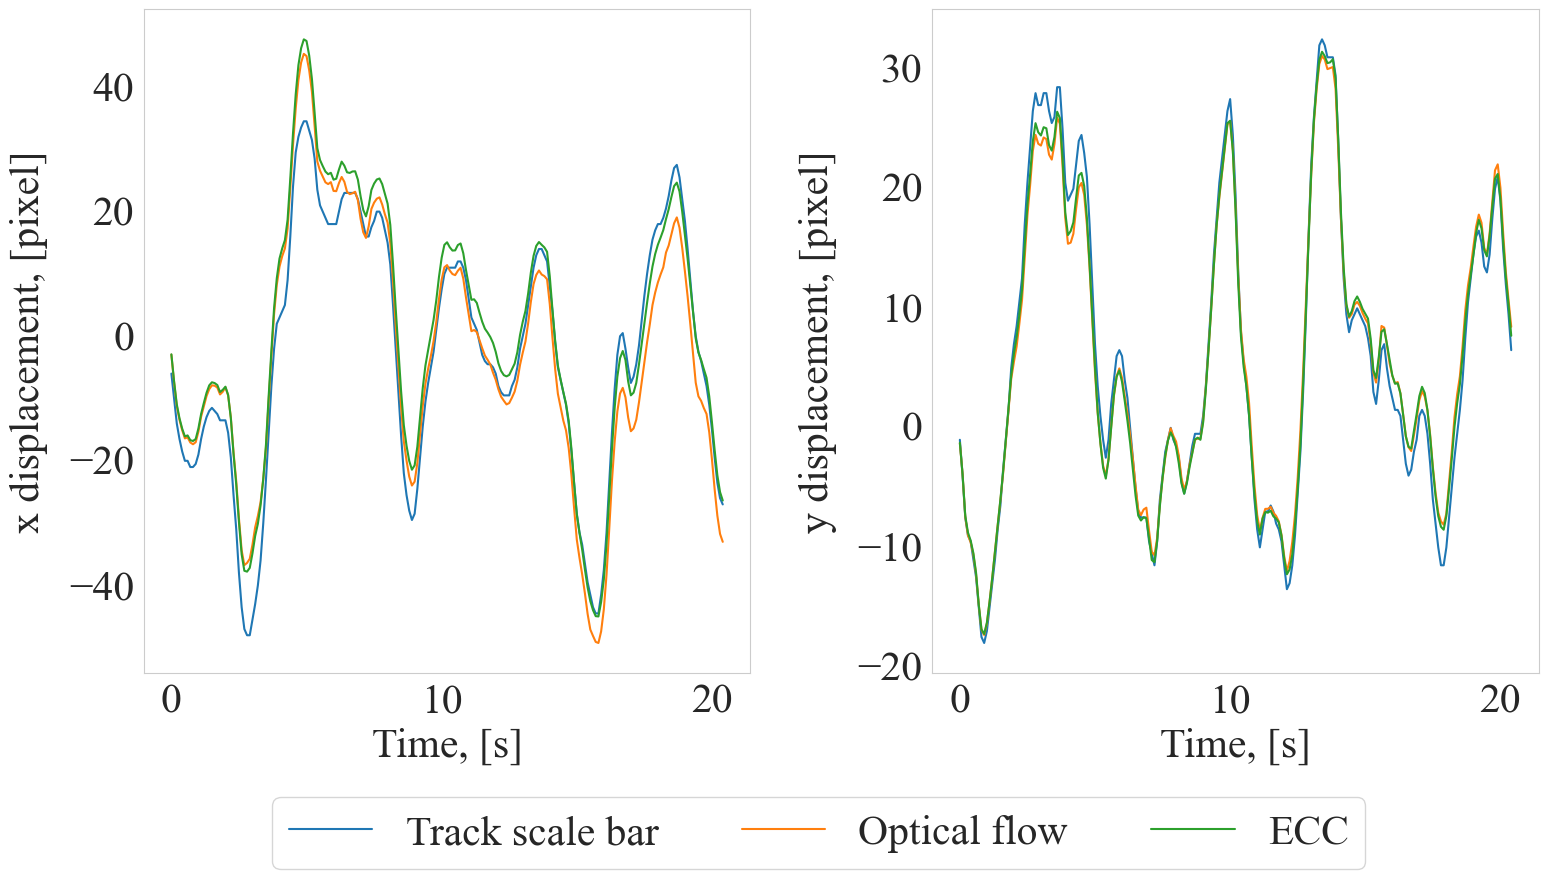

In [23]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style("whitegrid")

# Set the font to be serif (Times New Roman), rather than sans
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']

# Set the global font to be DejaVu Sans, size 20 (or any other sans-serif font of your choice!)
fontsize = 30
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['axes.labelsize'] = fontsize
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize

def normalize_list(data_list):
    min_value = min(data_list)
    max_value = max(data_list)
    return [(x - min_value) / (max_value - min_value) for x in data_list]

def load_camera_movement_data(filepath):
    with open(filepath, "r") as infile:
        camera_movement_data = json.load(infile)
    return camera_movement_data

def read_camera_movement_data_homograph(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)

    # Transform data into a NumPy array for easy manipulation
    data_array = np.array(data)

    # Split the data into separate arrays
    tx = data_array[:, 0]
    ty = data_array[:, 1]
    rx = data_array[:, 2]
    ry = data_array[:, 3]

    return tx, ty, rx, ry

# Use the function
file_path = "/path/to/camera_movement_data.txt"
tx, ty, rx, ry = read_camera_movement_data(file_path)


path = "//sf3.bss.phy.private.cam.ac.uk/cicutagroup/yz655/camera_shake_detection/videos/"
original_file = path+'rescale_crop_fps10_DJI_0047_camera_movement_data.txt'
optical_flow_file = path+'optical_flow_camera_movement_data.txt'
correlation_file = path+'correlation_camera_movement_data.txt'

original_data = load_camera_movement_data(original_file)
optical_flow_data = load_camera_movement_data(optical_flow_file)
correlation_data = load_camera_movement_data(correlation_file)

original_dx_list = np.array([x[2] for x in original_data])
optical_flow_dx_list = np.cumsum([x[2] for x in optical_flow_data])
correlation_dx_list = np.cumsum([x[2] for x in correlation_data])

x_offset_avg = np.mean(original_dx_list - optical_flow_dx_list)
original_dx_list = [x - x_offset_avg for x in original_dx_list]

original_dy_list = [x[3] for x in original_data]
optical_flow_dy_list = np.cumsum([x[3] for x in optical_flow_data])
correlation_dy_list = np.cumsum([x[3] for x in correlation_data])

y_offset_avg = np.mean(original_dy_list - optical_flow_dy_list)
original_dy_list = [y - y_offset_avg for y in original_dy_list]

fps = 10
time_list = np.array(range(len(original_dx_list))) / fps

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

line1, = axs[0].plot(time_list, original_dx_list, label='Track scale bar')
line2, = axs[0].plot(time_list, optical_flow_dx_list, label='Optical flow')
line3, = axs[0].plot(time_list, correlation_dx_list, label='ECC')
line4, = axs[1].plot(time_list, original_dy_list)
line5, = axs[1].plot(time_list, optical_flow_dy_list)
line6, = axs[1].plot(time_list, correlation_dy_list)

axs[0].set_xlabel('Time, [s]')
axs[0].set_ylabel('x displacement, [pixel]', labelpad=15)

axs[1].set_xlabel('Time, [s]')
axs[1].set_ylabel('y displacement, [pixel]', labelpad=15)

axs[0].grid(False)
axs[1].grid(False)


legend_labels = ['Track scale bar', 'Optical flow', 'ECC']

fig.legend([line1, line2, line3],     # The line objects
           labels=legend_labels,   # The labels for each line
           loc="lower center",   # Position of legend
           bbox_to_anchor=(0.5, -0.2),  # Position legend relative to figure
           borderaxespad=0.1,    # Add little spacing around the legend box
           ncol=3
           )

# Adjust the layout so everything fits
plt.subplots_adjust(bottom=0.05, wspace=0.3)  # Adjust the bottom margin to make space for the legend

# # Save the figure to .eps format
# plt.savefig('C:\\Users\\46596\\Desktop\\Multi DDM\\camera_shake_paper_figs\\compare_shake_detection_methods.eps', format='eps', bbox_inches='tight')
# plt.show()




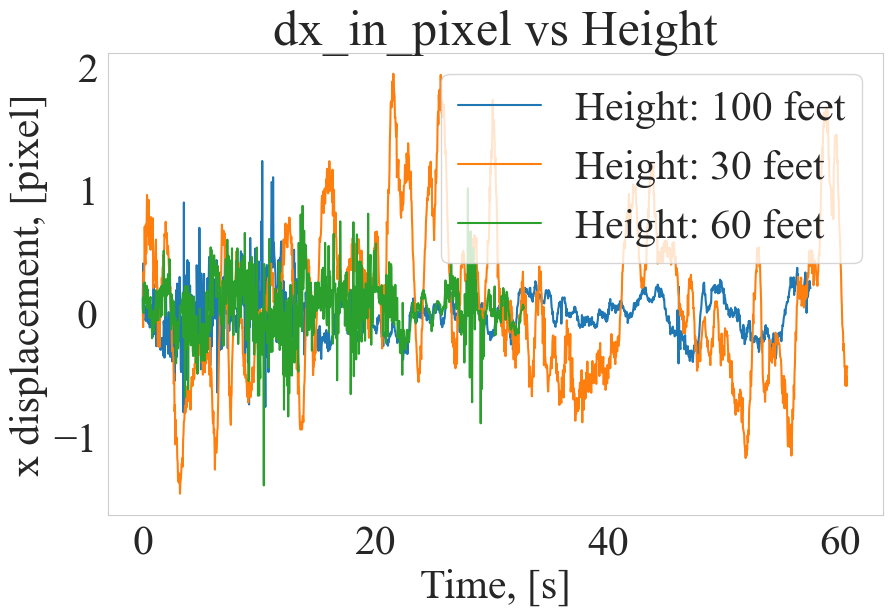

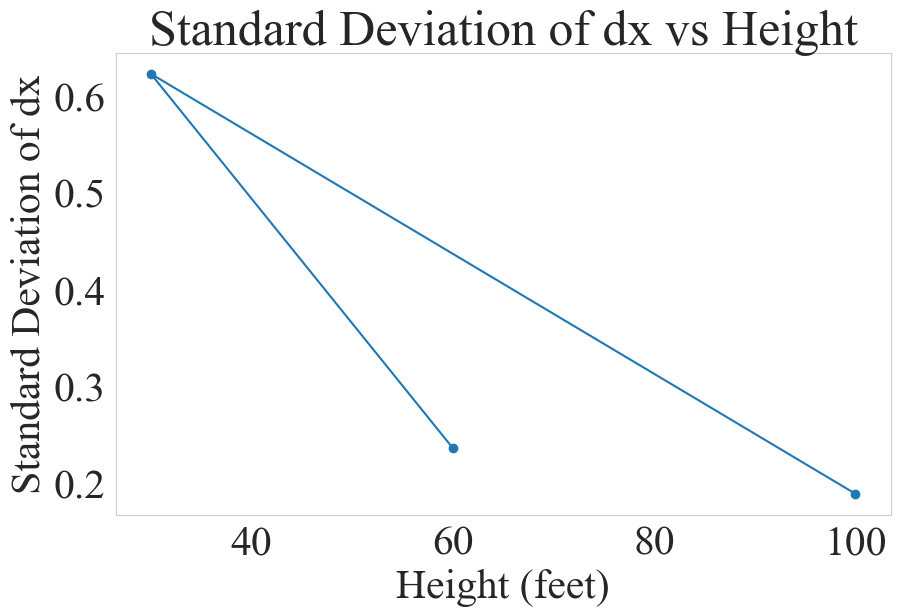

In [31]:
# import os
# import re
# import matplotlib.pyplot as plt
# import numpy as np

# data_folder = "//sf3.bss.phy.private.cam.ac.uk/cicutagroup/yz655/real_videos_exp/finn_videos_original_fps/"

# files = os.listdir(data_folder)
# pattern = re.compile(r"rescale_(\d+)feet_\d+_cropped_deshaked_optical_flow_camera_movement_data\.txt")

# fps = 29.97
# heights = []
# std_dx_list = []
# time_list = []
# dx_in_pixel_list = []

# for file in files:
#     match = pattern.match(file)
#     if match:
#         filepath = os.path.join(data_folder, file)

#         with open(filepath, "r") as infile:
#             camera_movement_data = eval(infile.read())

#         dx_in_pixel = [x[2] for x in camera_movement_data]
#         dx_in_pixel_list.append(dx_in_pixel)
#         std_dx = np.std(dx_in_pixel)

#         height = int(match.group(1))
#         heights.append(height)
#         std_dx_list.append(std_dx)
#         time_list.append(np.array(range(len(dx_in_pixel))) / fps)

# # Plotting dx_in_pixel vs height
# plt.figure(figsize=(10, 6))
# for i in range(3):
#     plt.plot(time_list[i], dx_in_pixel_list[i], linestyle="-")
    
# plt.xlabel("Time, [s]")
# plt.ylabel("x displacement, [pixel]")
# # plt.title("dx_in_pixel vs Height")
# plt.grid(True)
# plt.show()

# # Plotting std of dx vs height
# plt.figure(figsize=(10, 6))
# plt.plot(heights, std_dx_list, marker="o", linestyle="-")
# plt.xlabel("Height (feet)")
# plt.ylabel("Standard Deviation of dx")
# plt.title("Standard Deviation of dx vs Height")
# plt.grid(True)
# plt.show()

import os
import re
import matplotlib.pyplot as plt
import numpy as np

data_folder = "//sf3.bss.phy.private.cam.ac.uk/cicutagroup/yz655/real_videos_exp/finn_videos_original_fps/"

files = os.listdir(data_folder)
pattern = re.compile(r"rescale_(\d+)feet_\d+_cropped_deshaked_optical_flow_camera_movement_data\.txt")

fps = 29.97
heights = []
std_dx_list = []
time_list = []
dx_in_pixel_list = []

for file in files:
    match = pattern.match(file)
    if match:
        filepath = os.path.join(data_folder, file)

        with open(filepath, "r") as infile:
            camera_movement_data = eval(infile.read())

        dx_in_pixel = [x[2] for x in camera_movement_data]
        dx_in_pixel_list.append(dx_in_pixel)
        std_dx = np.std(dx_in_pixel)

        height = int(match.group(1))
        heights.append(height)
        std_dx_list.append(std_dx)
        time_list.append(np.array(range(len(dx_in_pixel))) / fps)

# Plotting dx_in_pixel vs height
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(time_list[i], dx_in_pixel_list[i], linestyle="-", label=f"Height: {heights[i]} feet")

plt.xlabel("Time, [s]")
plt.ylabel("x displacement, [pixel]")
plt.title("dx_in_pixel vs Height")
plt.legend()
plt.grid(False)
plt.show()

# Plotting std of dx vs height
plt.figure(figsize=(10, 6))
plt.plot(heights, std_dx_list, marker="o", linestyle="-")
plt.xlabel("Height (feet)")
plt.ylabel("Standard Deviation of dx")
plt.title("Standard Deviation of dx vs Height")
plt.grid(False)
plt.show()



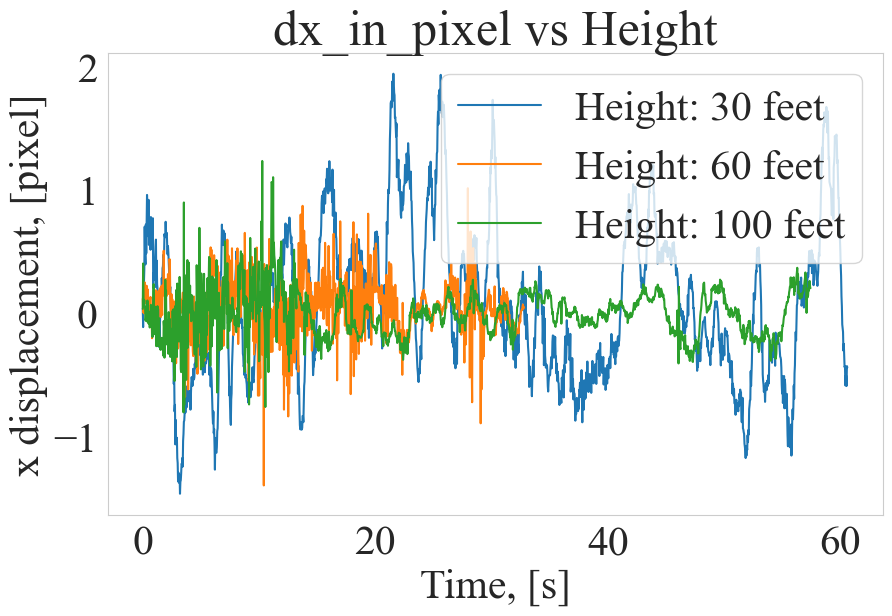

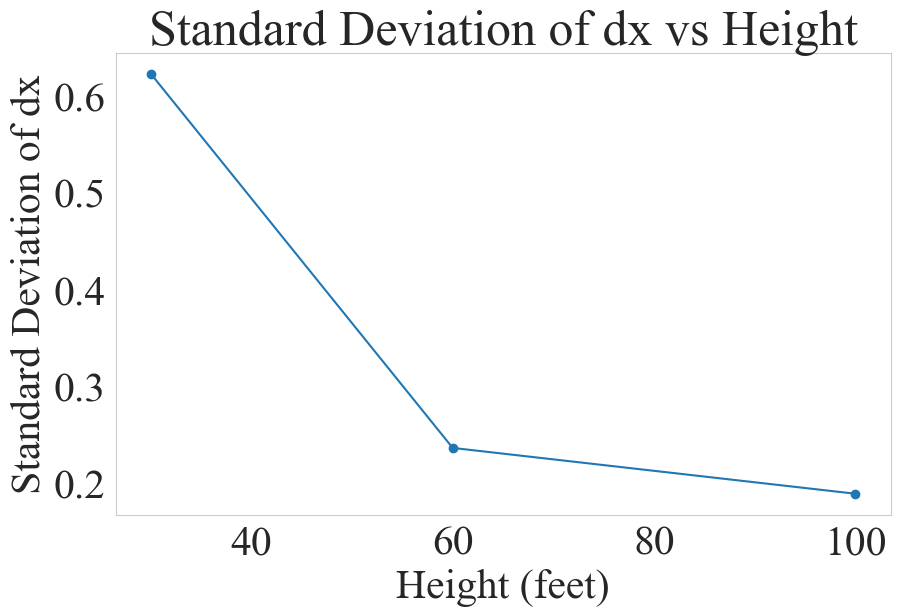

In [34]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

data_folder = "//sf3.bss.phy.private.cam.ac.uk/cicutagroup/yz655/real_videos_exp/finn_videos_original_fps/"

files = os.listdir(data_folder)
pattern = re.compile(r"rescale_(\d+)feet_\d+_cropped_deshaked_optical_flow_camera_movement_data\.txt")

fps = 29.97
heights = []
std_dx_list = []
time_list = []
dx_in_pixel_list = []

# Filter and sort only the .txt files
sorted_files = sorted([file for file in files if file.endswith('.txt')],
                      key=lambda x: int(pattern.search(x).group(1)) if pattern.search(x) else 0)

for file in sorted_files:
    match = pattern.match(file)
    if match:
        filepath = os.path.join(data_folder, file)

        with open(filepath, "r") as infile:
            camera_movement_data = eval(infile.read())

        dx_in_pixel = [x[2] for x in camera_movement_data]
        if len(dx_in_pixel) == 0:
            continue  # Skip files with no data

        dx_in_pixel_list.append(dx_in_pixel)
        std_dx = np.std(dx_in_pixel)

        height = int(match.group(1))
        heights.append(height)
        std_dx_list.append(std_dx)
        time_list.append(np.array(range(len(dx_in_pixel))) / fps)

# Plotting dx_in_pixel vs height
plt.figure(figsize=(10, 6))
for i in range(len(time_list)):
    plt.plot(time_list[i], dx_in_pixel_list[i], linestyle="-", label=f"Height: {heights[i]} feet")

plt.xlabel("Time, [s]")
plt.ylabel("x displacement, [pixel]")
plt.title("dx_in_pixel vs Height")
plt.legend()
plt.grid(False)
plt.show()

# Plotting std of dx vs height
plt.figure(figsize=(10, 6))
plt.plot(heights, std_dx_list, marker="o", linestyle="-")
plt.xlabel("Height (feet)")
plt.ylabel("Standard Deviation of dx")
plt.title("Standard Deviation of dx vs Height")
plt.grid(False)
plt.show()

